In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,auc
from sklearn.metrics import confusion_matrix,classification_report
np.set_printoptions(suppress=True)
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder


In [3]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
le=LabelEncoder()
le.fit(df.species)
df.species=le.transform(df.species)

In [5]:
y=label_binarize(df.species,classes=[0,1,2])
X=df.drop('species',axis=1)

In [6]:
clf=OneVsRestClassifier(LogisticRegression(solver='liblinear'))

In [7]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3)

In [8]:
clf.fit(xtrain,ytrain)

OneVsRestClassifier(estimator=LogisticRegression(solver='liblinear'))

In [9]:
ypred_prob=clf.predict_proba(xtest)

In [10]:
yp=np.argmax(clf.decision_function(xtest),axis=1)

In [11]:
yt=np.argmax(ytest,axis=1)

In [12]:
confusion_matrix(yp,yt)

array([[16,  0,  0],
       [ 0, 12,  0],
       [ 0,  3, 14]], dtype=int64)

In [13]:
accuracy_score(yt,yp)

0.9333333333333333

In [14]:
print(classification_report(yt,yp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.80      0.89        15
           2       0.82      1.00      0.90        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.95      0.93      0.93        45



In [15]:
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes=3
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ytest[:, i], ypred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

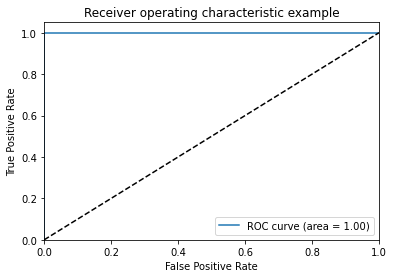

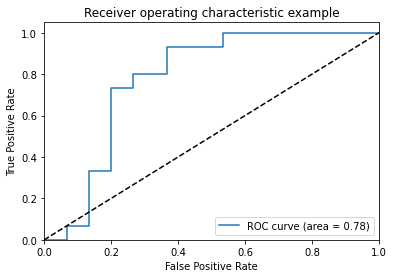

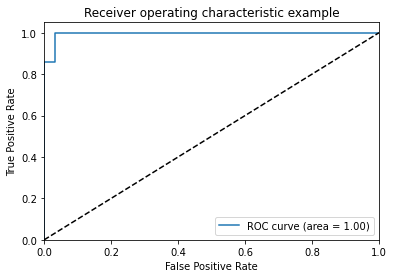

In [16]:
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()